In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
#Loading dataset
df = pd.read_csv("data/tasks.csv")
df.head()

,Project ID,Project Name,Project Type,Location,Start Date,End Date,Project Status,Priority,Task ID,Task Name,Task Status,Assigned To,Hours Spent,Budget,Actual Cost,Progress
0,P001,Renovation of a School Project 001,Renovation,Texas,21-07-2024,08-08-2024,Behind,Medium,T001,Task 001 of Renovation of a School Project 001,In Progress,Bob,12,9621,0,0.24
1,P001,Renovation of a School Project 001,Renovation,New Jersey,21-07-2024,12-08-2024,Behind,High,T002,Task 002 of Renovation of a School Project 001,In Progress,Charlie,4,7814,0,0.56
2,P001,Renovation of a School Project 001,Renovation,Ohio,21-07-2024,10-08-2024,Behind,High,T003,Task 003 of Renovation of a School Project 001,Completed,Charlie,5,1028,1011,1.00
3,P002,Innovation of a Classroom Project 002,Innovation,Pennsylvania,04-06-2024,12-07-2025,On Track,High,T001,Task 001 of Innovation of a Classroom Project 002,Pending,Charlie,24,1530,0,0.33
4,P002,Innovation of a Classroom Project 002,Innovation,New York,04-06-2024,26-06-2025,On Track,Medium,T002,Task 002 of Innovation of a Classroom Project 002,Pending,Charlie,26,7201,0,0.32


In [13]:
df.info()              # Check datatypes, missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Project ID      300 non-null    object 
 1   Project Name    300 non-null    object 
 2   Project Type    300 non-null    object 
 3   Location        300 non-null    object 
 4   Start Date      300 non-null    object 
 5   End Date        300 non-null    object 
 6   Project Status  300 non-null    object 
 7   Priority        300 non-null    object 
 8   Task ID         300 non-null    object 
 9   Task Name       300 non-null    object 
 10  Task Status     300 non-null    object 
 11  Assigned To     300 non-null    object 
 12  Hours Spent     300 non-null    int64  
 13  Budget          300 non-null    int64  
 14  Actual Cost     300 non-null    int64  
 15  Progress        300 non-null    float64
dtypes: float64(1), int64(3), object(12)
memory usage: 37.6+ KB


###  df.info() – Summary of Dataset

- The dataset has **300 rows** and **16 columns**.
- No missing values found – all columns are complete.
- There are **12 categorical columns** (e.g., Priority, Task Status, Assigned To).
- There are **4 numerical columns**: `Hours Spent`, `Budget`, `Actual Cost`, and `Progress`.
- Date fields (`Start Date`, `End Date`) are stored as strings and can be converted to datetime for further analysis.

In [26]:
df.describe(include='all')  # Show statistics for all columns

,Project ID,Project Name,Project Type,Location,Start Date,End Date,Project Status,Priority,Task ID,Task Name,Task Status,Assigned To,Hours Spent,Budget,Actual Cost,Progress,Cost Overrun %
count,300,300,300,300,300,300,300,300,300,300,300,300,300.000000,300.000000,300.000000,300.000000,300.000000
unique,100,100,6,13,84,211,4,3,3,300,3,8,NaN,NaN,NaN,NaN,NaN
top,P001,Renovation of a School Project 001,Other,Virginia,21-07-2024,25-09-2024,Behind,High,T001,Task 003 of Airport Expansion Project 100,Pending,Charlie,NaN,NaN,NaN,NaN,NaN
freq,3,3,99,33,6,18,87,156,100,1,107,60,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.210000,5624.266667,1728.070000,0.636067,-68.466869
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.505382,2706.584211,3012.743452,0.336683,50.818099
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1026.000000,0.000000,0.000000,-100.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,3312.000000,0.000000,0.352500,-100.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.500000,5751.500000,0.000000,0.680000,-100.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,8287.750000,2667.000000,1.000000,-8.970136


###  Insights from Summary Statistics:

- Most tasks are labeled **High priority** (52%) and are **Behind schedule**.
- **Charlie** is assigned the most tasks (20% of all).
- The average task is **63% complete**, but many still show 0% progress.
- **Actual cost** is ₹0 for many tasks — likely due to pending billing or missing data.
- The average **cost overrun** is **-68%**, indicating significant budget underuse — however, some tasks go up to **+207%**, pointing to overspending in few areas.
- **Budget** varies from ₹1,000 to ₹9,998, with a lot of variability.


In [27]:
df.isnull().sum()

Project ID        0
Project Name      0
Project Type      0
Location          0
Start Date        0
End Date          0
Project Status    0
Priority          0
Task ID           0
Task Name         0
Task Status       0
Assigned To       0
Hours Spent       0
Budget            0
Actual Cost       0
Progress          0
Cost Overrun %    0
dtype: int64

###  Missing Value Check (df.isnull().sum())

- All columns have **0 missing values**.
- The dataset is **clean** in terms of nulls — no need for imputation or row removal.
- This ensures we can proceed directly to feature engineering, analysis, or modeling without data loss.

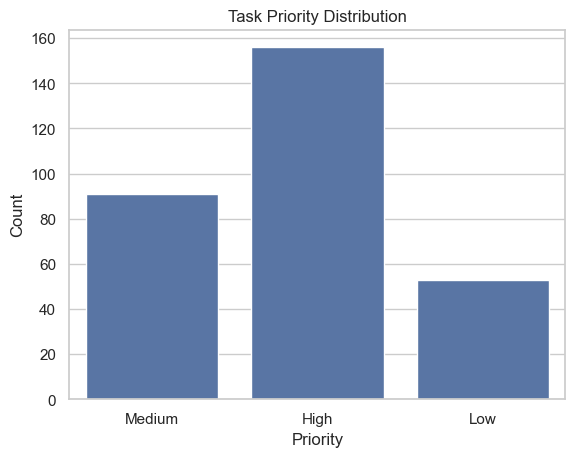

In [28]:
sns.countplot(x='Priority', data=df)
plt.title("Task Priority Distribution")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()


###  Task Priority Distribution

- The majority of tasks are labeled **High Priority** (~155 out of 300), indicating an emphasis on urgent or important work.
- **Medium Priority** tasks make up the second largest category (~90).
- Only a small portion of tasks are **Low Priority** (~50), suggesting that lower urgency tasks are either minimal or deprioritized.

**Inference:**  
The task workload is skewed toward higher urgency. This could imply tight deadlines, resource constraints, or risk of overburdening the team if not managed well.

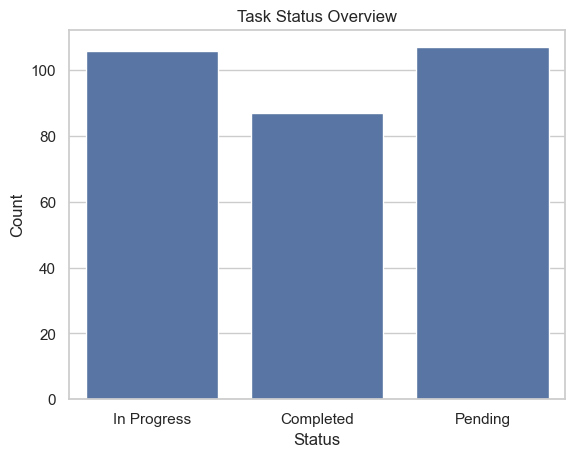

In [29]:
sns.countplot(x='Task Status', data=df)
plt.title("Task Status Overview")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

###  Task Status Overview

- **Pending** and **In Progress** tasks dominate the dataset, each with over **100 tasks**.
- **Completed** tasks are slightly fewer (under 90), suggesting that a significant portion of work is still underway or yet to begin.

 **Inference:**
- Nearly **2/3 of all tasks are unfinished**, highlighting an opportunity to improve task completion rates.
- This may indicate workload bottlenecks, project delays, or dependency issues.
- Project managers should focus on accelerating task transitions from "In Progress" to "Completed" to ensure timely delivery.


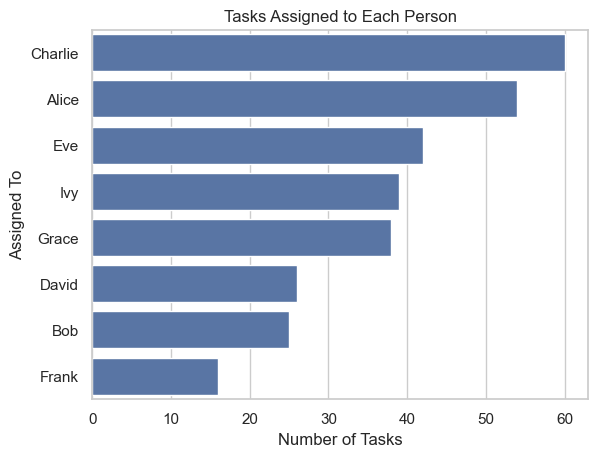

In [30]:
sns.countplot(y='Assigned To', data=df, order=df['Assigned To'].value_counts().index)
plt.title("Tasks Assigned to Each Person")
plt.xlabel("Number of Tasks")
plt.ylabel("Assigned To")
plt.show()

###  Task Assignment Overview

- **Charlie** is assigned the most tasks (≈60), followed by **Alice** (≈55).
- **Frank** has the fewest tasks (≈15), and **Bob** & **David** also have relatively fewer tasks.
- The top 3 assignees (Charlie, Alice, Eve) handle nearly **50%** of all tasks.

 **Inference:**
- Task allocation is **uneven** — some team members (e.g., Charlie, Alice) are handling a disproportionate workload.
- This may affect task quality or cause burnout if not balanced properly.
- It could be helpful to investigate:
  - Whether high performers are overloaded.
  - If certain roles require more tasks by design.
  - Or if reassigning some pending tasks could improve productivity.


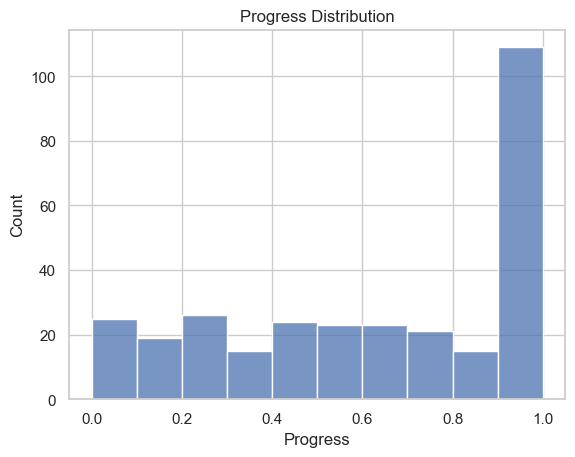

In [31]:
sns.histplot(df['Progress'], bins=10)
plt.title("Progress Distribution")
plt.xlabel("Progress")
plt.ylabel("Count")
plt.show()

###  Task Progress Distribution

- A **large number of tasks (~110)** have a progress of **1.0**, meaning they are fully completed.
- Many other tasks are spread across all progress levels, but there’s a visible dip in the mid-range (0.4 to 0.8).
- A smaller but noticeable number of tasks show **0% progress**, indicating no work has started.

 **Inference:**
- While many tasks are successfully completed, a significant number are still at **early or mid-stages**.
- There may be **bottlenecks** delaying some tasks from reaching completion, or poor progress tracking in the system.

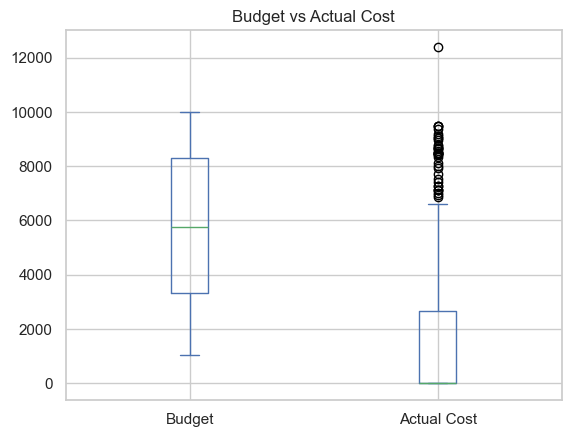

In [32]:
df[['Budget', 'Actual Cost']].plot(kind='box')
plt.title("Budget vs Actual Cost")
plt.show()

###  Budget vs Actual Cost

- The **Budget** values are fairly well distributed, ranging mostly from ₹3,000 to ₹9,000, with few extreme values.
- The **Actual Cost** has a large number of **zero values**, which may indicate:
  - Unbilled tasks
  - Missing entries
  - Tasks still in progress
- There's significant **right-skewness** in Actual Cost — with many **extreme outliers** (above ₹12,000).
- The median of Actual Cost is **much lower** than the Budget median, suggesting **underutilization of funds** in most cases.

 **Inference:**
- Many projects are running **under budget** or costs are not yet updated.
- A few projects are **overspending**, indicating a need for better cost tracking or forecasting.


In [33]:
df['Cost Overrun %'] = ((df['Actual Cost'] - df['Budget']) / df['Budget']) * 100
df[['Budget', 'Actual Cost', 'Cost Overrun %']].head()

,Budget,Actual Cost,Cost Overrun %
0,9621,0,-100.000000
1,7814,0,-100.000000
2,1028,1011,-1.653696
3,1530,0,-100.000000
4,7201,0,-100.000000


####  Insights:
- A large number of tasks (like the 4 above) have an **Actual Cost of ₹0**, resulting in **-100% overrun**, likely due to:
  - Pending billing
  - Incomplete entries
  - Ongoing tasks not yet updated
- Only one task shows a small under-budget variance (~ -1.65%).

This metric will be useful to:
- Flag potential budget entry issues
- Analyze cost performance across task types or assignees

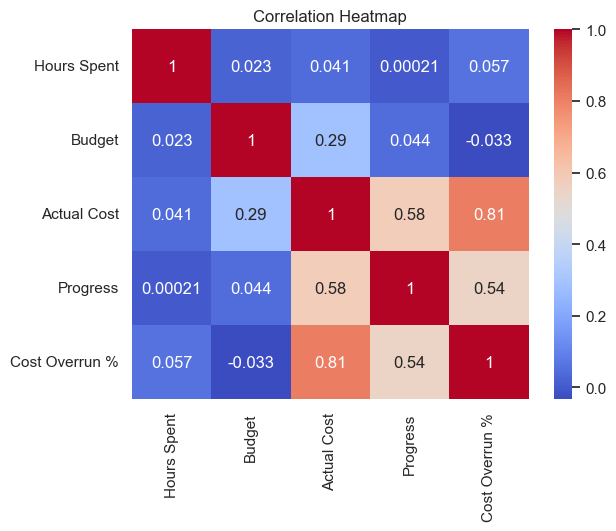

In [34]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

###  Correlation Heatmap – Summary

Created a correlation heatmap to explore relationships between key numerical variables:  
**Hours Spent**, **Budget**, **Actual Cost**, **Progress**, and **Cost Overrun %**.

####  Key Observations:

- **Actual Cost vs Cost Overrun %**:  **Strong positive correlation (0.81)**  
  → Higher actual costs are directly responsible for overruns.

- **Progress vs Actual Cost**:  **Moderate positive correlation (0.58)**  
  → Tasks that are more complete tend to have more actual cost recorded.

- **Progress vs Cost Overrun %**:  **Moderate correlation (0.54)**  
  → Tasks with more progress tend to reflect their overrun more accurately.

- **Budget vs Actual Cost**:  **Low correlation (0.29)**  
  → Indicates budgets are not tightly aligned with actual spending.

- **Hours Spent** shows **very weak correlation** with all other metrics, which could mean:
  - Poor logging of time,
  - Inconsistent estimation,
  - Or decoupling of time and cost in this dataset.

####  Insights:
- Focus more on **Actual Cost** and **Progress** to model task completion or risk of overrun.
- **Hours Spent** may not be a good predictor unless further cleaned or engineered.

